In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/fake_or_real_news.csv')
data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
X = data['text']
Y = data['label']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.30, random_state = 1)

In [4]:
cv = CountVectorizer()
features = cv.fit_transform(x_train)

In [5]:
model = svm.SVC()
model.fit(features, y_train)

SVC()

In [6]:
features_test = cv.transform(x_test)
print(f'Accuracy : {round(model.score(features_test, y_test), 4)*100}%')

Accuracy : 86.17%


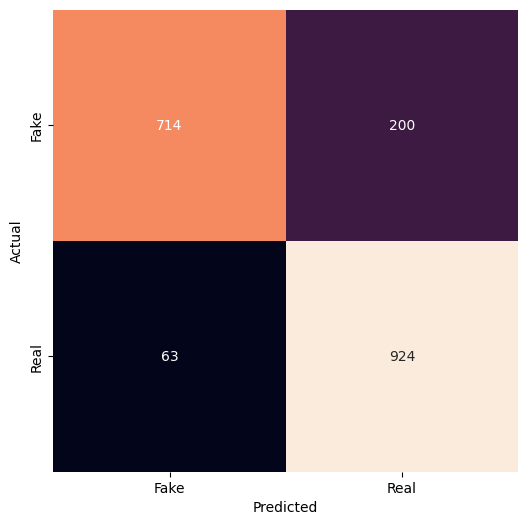

Classification Report ---------->
               precision    recall  f1-score   support

        REAL       0.92      0.78      0.84       914
        FAKE       0.82      0.94      0.88       987

    accuracy                           0.86      1901
   macro avg       0.87      0.86      0.86      1901
weighted avg       0.87      0.86      0.86      1901



In [7]:
pred = model.predict(features_test)
cm = confusion_matrix(y_test, pred, labels = ['REAL', 'FAKE'])
clr = classification_report(y_test, pred, labels = ['REAL', "FAKE"], target_names = ['REAL', 'FAKE'] )
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xticks(ticks = [0.5, 1.5], labels = ['Fake', 'Real'])
plt.yticks(ticks = [0.5, 1.5], labels= ['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Classification Report ---------->\n', clr)